In [79]:
""" Pandas Practice Dataset """

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

print(df)

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

In [80]:
""" Data Cleaning """

# Convert to datetime (handles inconsistent formats)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Check for missing values
print("\nMissing Value:")
print(df.isnull().sum())

# Handle missing calories (fill with median)
df["Calories"] = df["Calories"].fillna(df["Calories"].median())

# Drop rows with missing dates
df = df.dropna(subset=["Date"])


Missing Value:
Duration    0
Date        2
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [81]:
""" Clean Anomalous Data """

# Fix outlier in Duration (450 minutes » probably 45)
df.loc[df['Duration'] > 120, 'Duration'] = 45

# Fix pulse inversion (Maxpulse < Pulse)
df.loc[df['Maxpulse'] < df['Pulse'], ['Pulse', 'Maxpulse']] = df.loc[df['Maxpulse'] < df['Pulse'], ['Maxpulse', 'Pulse']].values

In [128]:
""" Feature Engineering """

# Add day of week
df['Day'] = df['Date'].dt.day_name()

# Add intensity level
df['Intensity'] = pd.cut(df['Calories'],
                         bins=[0, 250, 350, float('inf')],
                         labels=['Low','Medium', 'High'])
print(df['Intensity'].value_counts())
df

Intensity
Medium    17
High       7
Low        6
Name: count, dtype: int64


,Duration,Date,Pulse,Maxpulse,Calories,Day,Intensity,Pulse_Efficiency
0,60,2020-12-01,110,130,409.1,Tuesday,High,3.719091
1,60,2020-12-02,117,145,479.0,Wednesday,High,4.094017
2,60,2020-12-03,103,135,340.0,Thursday,Medium,3.300971
3,45,2020-12-04,109,175,282.4,Friday,Medium,2.590826
4,45,2020-12-05,117,148,406.0,Saturday,High,3.470085
5,60,2020-12-06,102,127,300.0,Sunday,Medium,2.941176
6,60,2020-12-07,110,136,374.0,Monday,High,3.400000
7,45,2020-12-08,104,134,253.3,Tuesday,Medium,2.435577
8,30,2020-12-09,109,133,195.1,Wednesday,Low,1.789908
9,60,2020-12-10,98,124,269.0,Thursday,Medium,2.744898


In [83]:
""" Exploratory Analysis """

' Exploratory Analysis '

In [84]:
# Basic Statistics
print("\nSummary Statistics:")
print(df.describe())
print(f"\nWorkouts by Intensity:")
print(df['Intensity'].value_counts())


Summary Statistics:
        Duration                 Date       Pulse    Maxpulse    Calories
count  30.000000                   30   30.000000   30.000000   30.000000
mean   56.000000  2020-12-15 08:00:00  102.766667  130.066667  306.360000
min    30.000000  2020-12-01 00:00:00   90.000000  112.000000  195.100000
25%    60.000000  2020-12-08 06:00:00  100.000000  123.000000  251.350000
50%    60.000000  2020-12-14 12:00:00  102.500000  129.500000  295.600000
75%    60.000000  2020-12-22 12:00:00  105.750000  132.750000  343.975000
max    60.000000  2020-12-31 00:00:00  117.000000  175.000000  479.000000
std     7.812457                  NaN    6.339169   12.102816   65.155763

Workouts by Intensity:
Intensity
Medium    17
High       7
Low        6
Name: count, dtype: int64


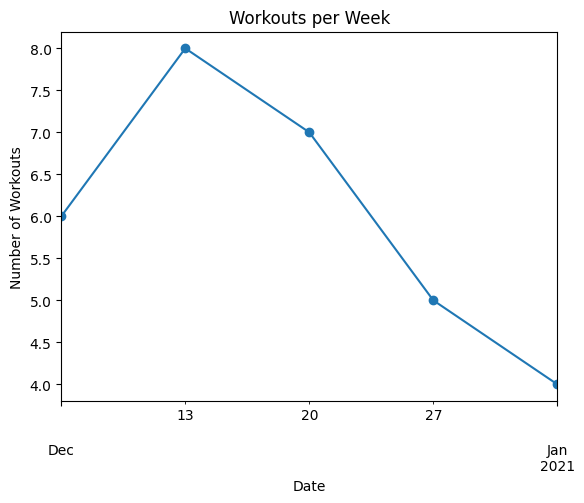

In [85]:
# Time-Based Analysis
weekly = df.resample('W', on='Date').size() # Weekly workout frequency
weekly.plot(title="Workouts per Week", marker="o")
plt.ylabel('Number of Workouts')
plt.show()

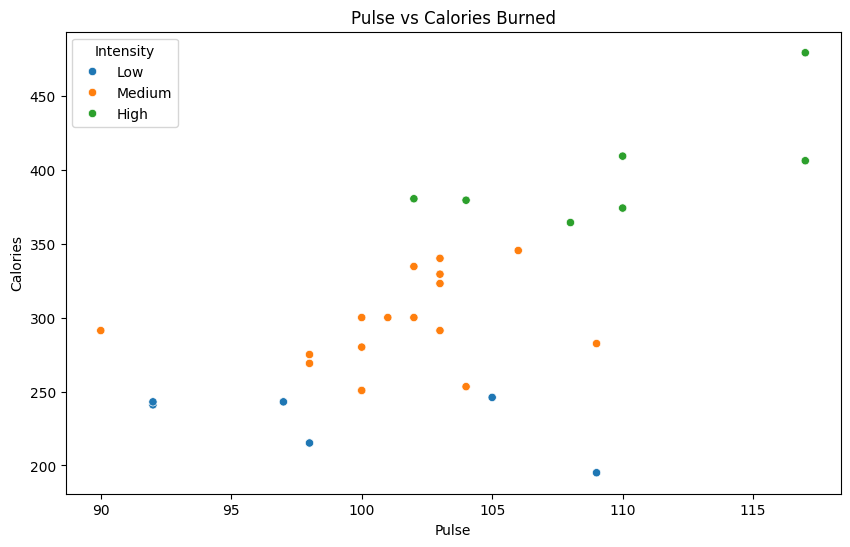

In [86]:
# Pulse & Calories Relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pulse', y='Calories', hue='Intensity', data=df)
plt.title('Pulse vs Calories Burned')
plt.show()

In [87]:
""" KEY INSIGHTS """

' KEY INSIGHTS '

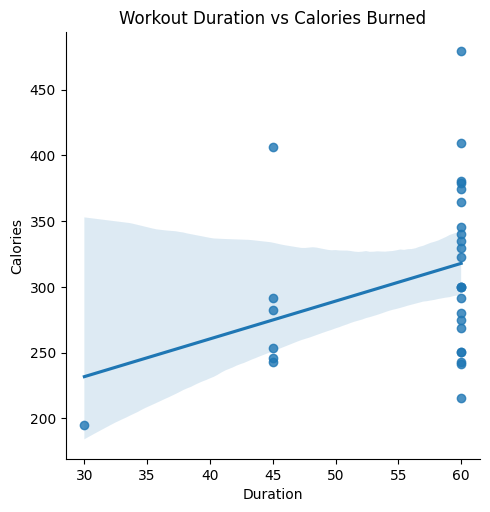

In [88]:
# Duration vs Calories
sns.lmplot(x='Duration', y='Calories', data=df)
plt.title('Workout Duration vs Calories Burned')
plt.show()

In [89]:
# Best Days for Workouts
day_stats = df.groupby("Day").agg({
    'Calories': 'mean',
    'Duration': 'mean'
}).sort_values('Calories', ascending=False)

print("\nMost Effective Days:")
print(day_stats)


Most Effective Days:
           Calories  Duration
Day                          
Monday      352.175     60.00
Wednesday   313.920     54.00
Friday      309.350     52.50
Saturday    307.600     56.25
Tuesday     304.350     56.25
Sunday      282.325     56.25
Thursday    279.600     57.00


In [90]:
# Pulse Efficiency
df['Pulse_Efficiency'] = df['Calories'] / df['Pulse']
efficient_days = df.groupby('Day')['Pulse_Efficiency'].mean().sort_values(ascending=False)

print("\nMost Efficient Days (Calories per BPM):")
print(efficient_days)


Most Efficient Days (Calories per BPM):
Day
Monday       3.311631
Friday       3.075720
Wednesday    2.955714
Tuesday      2.940198
Saturday     2.905002
Sunday       2.830861
Thursday     2.806006
Name: Pulse_Efficiency, dtype: float64


In [91]:
""" Adding Weather Data to See if Temprature Affects Performance """

' Adding Weather Data '

In [95]:
# Generate mock weather data (in practice, use API like OpenWeatherMap)
weather_data = {
    'Date': pd.date_range(start='2020-12-01', end='2020-12-31'),
    'Temp_F': [45, 48, 42, 38, 40, 43, 41, 39, 44, 47, 
               50, 52, 49, 45, 43, 40, 38, 36, 39, 42,
               45, 47, 44, 41, 39, 37, 40, 43, 45, 48, 50]
}

weather_df = pd.DataFrame(weather_data)

merged_df = pd.merge(df, weather_df, on='Date', how='left')

merged_df.head()

,Duration,Date,Pulse,Maxpulse,Calories,Day,Intensity,Pulse_Efficiency,Temp_F
0,60,2020-12-01,110,130,409.1,Tuesday,High,3.719091,45
1,60,2020-12-02,117,145,479.0,Wednesday,High,4.094017,48
2,60,2020-12-03,103,135,340.0,Thursday,Medium,3.300971,42
3,45,2020-12-04,109,175,282.4,Friday,Medium,2.590826,38
4,45,2020-12-05,117,148,406.0,Saturday,High,3.470085,40


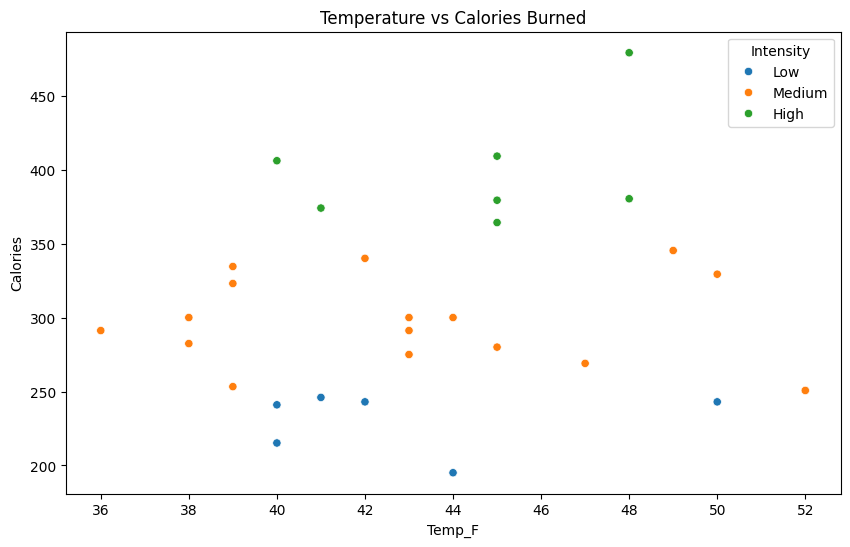


Temperature Correlation
            Temp_F  Calories  Duration
Temp_F    1.000000  0.097620  0.375937
Calories  0.097620  1.000000  0.344247
Duration  0.375937  0.344247  1.000000


In [97]:
# STEP 1: Temperature Impact Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temp_F', y='Calories', hue="Intensity", data=merged_df)
plt.title('Temperature vs Calories Burned')
plt.show()

# Correlation Calculation
print("\nTemperature Correlation")
print(merged_df[['Temp_F', 'Calories', 'Duration']].corr())

In [ ]:
""" Weekly Progress Tracking """

In [106]:
# Step 1: Weekly Aggregates
weekly_progress = merged_df.resample("W", on="Date").agg({
    'Duration': 'sum',
    'Calories': 'sum',
    'Temp_F': 'mean'
}).reset_index()

# Calculate Efficiency
weekly_progress["Calories_per_min"] = (weekly_progress["Calories"] / weekly_progress["Duration"]).round(2)

print(weekly_progress)

        Date  Duration  Calories     Temp_F  Calories_per_min
0 2020-12-06       330    2216.5  42.666667              6.72
1 2020-12-13       435    2267.4  46.750000              5.21
2 2020-12-20       390    2026.7  40.428571              5.20
3 2020-12-27       285    1485.7  41.800000              5.21
4 2021-01-03       240    1194.5  46.500000              4.98


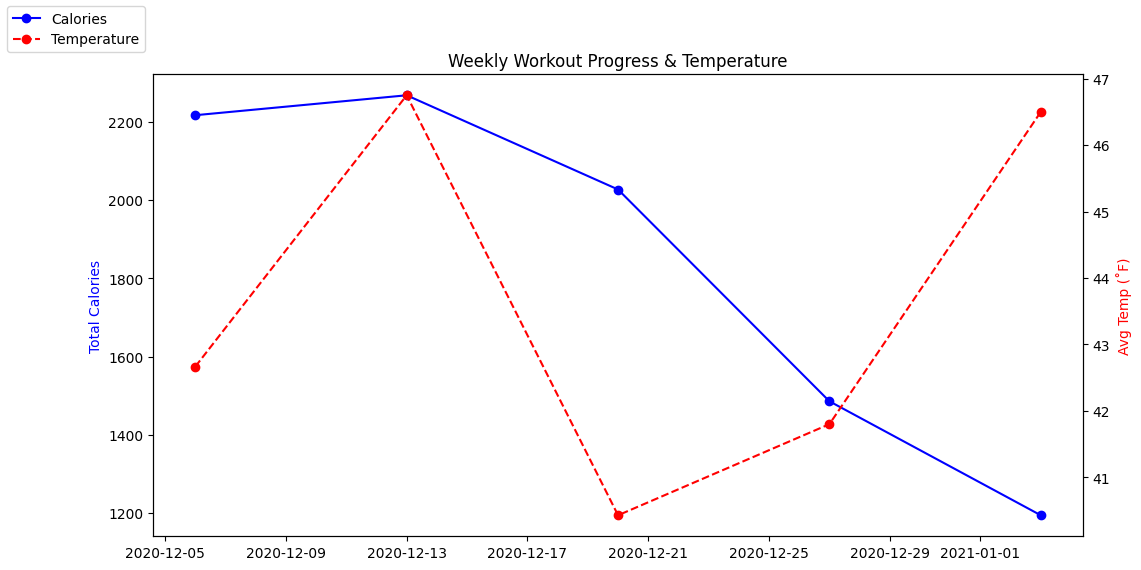

In [113]:
# Step 2: Progress Visualization

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Calories
ax1.plot(weekly_progress["Date"], weekly_progress["Calories"], "b-o", label="Calories")
ax1.set_ylabel("Total Calories", color="b")

# Plot Temperature
ax2 = ax1.twinx()
ax2.plot(weekly_progress["Date"], weekly_progress["Temp_F"], 'r--o', label="Temperature")
ax2.set_ylabel("Avg Temp (˚F)", color='r')

plt.title("Weekly Workout Progress & Temperature")
fig.legend(loc="upper left")
plt.show()

In [ ]:
""" Calorie Prediction Model (Linear Regression)"""

In [118]:
# Step 1: Prepare Data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = merged_df[["Duration", "Pulse", "Temp_F"]]
y = merged_df[["Calories"]]

In [123]:
# Step 2: Train & Evaluate Model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)
merged_df["Predicted_Calories"] = predictions

# Evaluation
r2 = r2_score(y, predictions)
print(f"\nModel R-squared: {r2:.2f}")

# Show coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_.reshape(-1)
})
print("\nFeature Importance")
print(coefficients)


Model R-squared: 0.64

Feature Importance
    Feature  Importance
0  Duration    4.433714
1     Pulse    7.625916
2    Temp_F   -1.941476


In [ ]:
"""  Exporting Results """

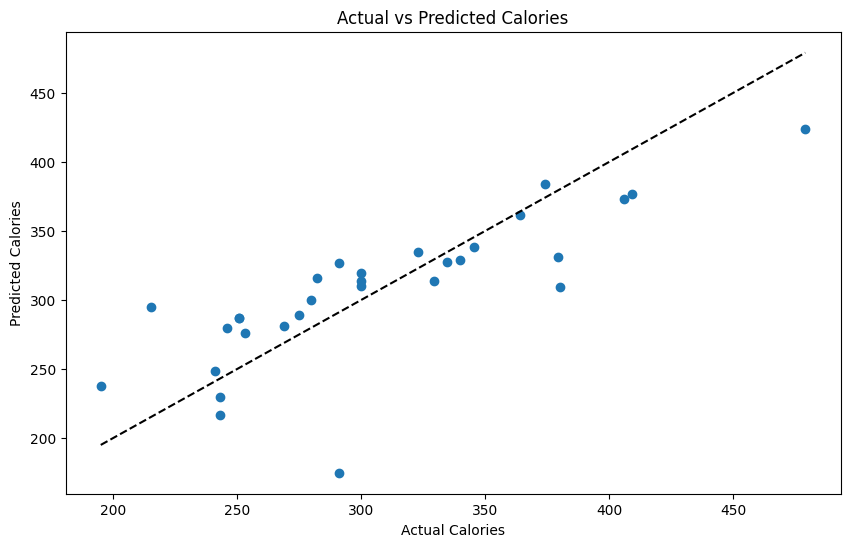

In [126]:
# Step 3: Prediction Visualization
plt.figure(figsize=(10,6))
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()

In [127]:
# Save enhanced dataset
merged_df.to_csv('enhanced_workout_data.csv', index=False)

# Save model results
with pd.ExcelWriter('advanced_analysis.xlsx') as writer:
    weekly_progress.to_excel(writer, sheet_name='Weekly Progress')
    coefficients.to_excel(writer, sheet_name='Model Coefficients')